# Extract site 734 counts
This notebook simply loads the codon counts for each sample and extracts the site 734 data. This data is merged into a single dataframe for all samples and export as a CSV.

Notebook setup


In [1]:
import os.path
import numpy as np
import pandas as pd
import plotnine as p9

# print imports and versions
# copied from https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
print('\n'.join(f'{m.__name__}=={m.__version__}' \
                for m in globals().values() if getattr(m, '__version__', None)))

numpy==1.19.1
pandas==0.25.3
plotnine==0.6.0


Input data



In [2]:
samplesheet = '../data/samplesheet.csv'
codon_lookup_file = '../data/codon_lookup_table.csv'
permitted_codons_file = '../results/site_734/permitted_codons.csv'

Output data

In [3]:
results_dir = '../results/'
site_734_dir = results_dir + 'site_734/'
site_734_counts = site_734_dir + 'site_734_counts.csv'

Notebook aesthetics

In [4]:
p9.theme_set(p9.theme_classic())
CBPALETTE_RICH = ['#648FFF', '#FFB000', '#DC267F', '#785EF0', '#FE6100']

## Load data
Load samples

In [5]:
samples = pd.read_csv(samplesheet)
samples = samples.drop('r1_file', axis=1)
samples.insert(0, 'name', (samples['library'] + '-' +
                           samples['source'] + '-' +
                           samples['stage'] + '-' +
                           samples['sorted']))
samples['codon_counts_file'] = (results_dir +
                                'codon_counts/' +
                                samples['library'] + '-' +
                                samples['source'] + '-' +
                                samples['stage'] + '-' +
                                samples['sorted'] +
                                '_codoncounts.csv')
display(samples)

,name,library,source,stage,sorted,codon_counts_file
0,wt-plasmid-noStage-notSorted,wt,plasmid,noStage,notSorted,../results/codon_counts/wt-plasmid-noStage-not...
1,wt-gDNA-noStage-notSorted,wt,gDNA,noStage,notSorted,../results/codon_counts/wt-gDNA-noStage-notSor...
2,lib1-plasmid-noStage-notSorted,lib1,plasmid,noStage,notSorted,../results/codon_counts/lib1-plasmid-noStage-n...
3,lib2-plasmid-noStage-notSorted,lib2,plasmid,noStage,notSorted,../results/codon_counts/lib2-plasmid-noStage-n...
4,lib3-plasmid-noStage-notSorted,lib3,plasmid,noStage,notSorted,../results/codon_counts/lib3-plasmid-noStage-n...
5,lib1-gDNA-early-notSorted,lib1,gDNA,early,notSorted,../results/codon_counts/lib1-gDNA-early-notSor...
6,lib2-gDNA-early-notSorted,lib2,gDNA,early,notSorted,../results/codon_counts/lib2-gDNA-early-notSor...
7,lib3-gDNA-early-notSorted,lib3,gDNA,early,notSorted,../results/codon_counts/lib3-gDNA-early-notSor...
8,lib1-gDNA-mid-notSorted,lib1,gDNA,mid,notSorted,../results/codon_counts/lib1-gDNA-mid-notSorte...
9,lib2-gDNA-mid-notSorted,lib2,gDNA,mid,notSorted,../results/codon_counts/lib2-gDNA-mid-notSorte...


## Extract site 734
Extract just the site 734 codon counts from each sample

In [6]:
def extract_site_734(sample_name):
    codon_counts_file = samples.query(f'name == "{sample_name}"')['codon_counts_file'].iloc[0]
    print(f'Extarcting site 734 from {codon_counts_file}')
    codon_counts = pd.read_csv(codon_counts_file)
    site_734 = codon_counts.query('site == 734')
    site_734.insert (0, "name", sample_name)
    site_734.insert (1, "library", samples.query(f'name == "{sample_name}"')['library'].iloc[0])
    site_734.insert (2, "source", samples.query(f'name == "{sample_name}"')['source'].iloc[0])
    site_734.insert (3, "stage", samples.query(f'name == "{sample_name}"')['stage'].iloc[0])
    site_734.insert (4, "sorted", samples.query(f'name == "{sample_name}"')['sorted'].iloc[0])
    return site_734

In [7]:
codon_counts = pd.DataFrame()
        
for index, sample in samples.iterrows():
    sample_df = extract_site_734(sample['name'])
    codon_counts = codon_counts.append(sample_df, ignore_index=True)
display(codon_counts)

Extarcting site 734 from ../results/codon_counts/wt-plasmid-noStage-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/wt-gDNA-noStage-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib1-plasmid-noStage-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib2-plasmid-noStage-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib3-plasmid-noStage-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib1-gDNA-early-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib2-gDNA-early-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib3-gDNA-early-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib1-gDNA-mid-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib2-gDNA-mid-notSorted_codoncounts.csv
Extarcting site 734 from ../results/codon_counts/lib3-gDNA-mid-notSorted_cod

,name,library,source,stage,sorted,site,wildtype,AAA,AAC,AAG,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,wt-plasmid-noStage-notSorted,wt,plasmid,noStage,notSorted,734,GAT,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,wt-gDNA-noStage-notSorted,wt,gDNA,noStage,notSorted,734,GAT,0,33,0,...,0,0,0,154,0,0,0,0,0,0
2,lib1-plasmid-noStage-notSorted,lib1,plasmid,noStage,notSorted,734,GAT,0,129,64,...,0,0,123,84,85,0,0,65,0,0
3,lib2-plasmid-noStage-notSorted,lib2,plasmid,noStage,notSorted,734,GAT,0,54,65,...,0,0,54,51,63,0,0,62,0,0
4,lib3-plasmid-noStage-notSorted,lib3,plasmid,noStage,notSorted,734,GAT,0,83,88,...,0,0,79,68,101,0,0,64,0,0
5,lib1-gDNA-early-notSorted,lib1,gDNA,early,notSorted,734,GAT,0,82,88,...,0,0,188,55,137,0,0,42,0,0
6,lib2-gDNA-early-notSorted,lib2,gDNA,early,notSorted,734,GAT,0,85,71,...,0,0,63,179,74,5,0,14,0,0
7,lib3-gDNA-early-notSorted,lib3,gDNA,early,notSorted,734,GAT,0,77,71,...,0,0,95,117,71,1,0,60,0,0
8,lib1-gDNA-mid-notSorted,lib1,gDNA,mid,notSorted,734,GAT,0,47,126,...,0,0,132,25,226,0,0,51,0,0
9,lib2-gDNA-mid-notSorted,lib2,gDNA,mid,notSorted,734,GAT,0,49,216,...,0,0,31,131,119,0,0,52,0,0


Make dataframe long:

In [8]:
codon_counts = codon_counts.melt(
    id_vars=['name',
             'library',
             'source',
             'stage',
             'sorted',
             'site',
             'wildtype'],
    var_name='codon',
    value_name='count'
)
display(codon_counts)

,name,library,source,stage,sorted,site,wildtype,codon,count
0,wt-plasmid-noStage-notSorted,wt,plasmid,noStage,notSorted,734,GAT,AAA,0
1,wt-gDNA-noStage-notSorted,wt,gDNA,noStage,notSorted,734,GAT,AAA,0
2,lib1-plasmid-noStage-notSorted,lib1,plasmid,noStage,notSorted,734,GAT,AAA,0
3,lib2-plasmid-noStage-notSorted,lib2,plasmid,noStage,notSorted,734,GAT,AAA,0
4,lib3-plasmid-noStage-notSorted,lib3,plasmid,noStage,notSorted,734,GAT,AAA,0
...,...,...,...,...,...,...,...,...,...
1083,lib2-gDNA-late-notSorted,lib2,gDNA,late,notSorted,734,GAT,TTT,0
1084,lib3-gDNA-late-notSorted,lib3,gDNA,late,notSorted,734,GAT,TTT,0
1085,lib1-gDNA-late-sorted,lib1,gDNA,late,sorted,734,GAT,TTT,0
1086,lib2-gDNA-late-sorted,lib2,gDNA,late,sorted,734,GAT,TTT,0


**Calculate error rate on WT samples**

In [9]:
error_rate_df = codon_counts.copy()
error_rate_df['wt'] = (error_rate_df['codon'] ==
                       error_rate_df['wildtype'])
error_rate_df = (
    error_rate_df
    .query('library == "wt"')
    .groupby(['name', 'library', 'source', 'wt'])
    ['count']
    .sum()
    .reset_index(name='count')
)
total_count = (
    error_rate_df
    .groupby('name')
    ['count']
    .sum()
    .reset_index(name='total_count'))
error_rate_df = error_rate_df.merge(
    right=total_count,
    on='name'
)
error_rate_df['frac_wt'] = (
    error_rate_df['count'] /
    error_rate_df['total_count']
)

print('The error rate observed in WT samples is:')
display(error_rate_df.query('wt == False')[['library','source','wt','frac_wt']])

The error rate observed in WT samples is:


,library,source,wt,frac_wt
0,wt,gDNA,False,0.012152
2,wt,plasmid,False,0.001324


Interpretation: These samples have a very, very low error rate of 0.1-1%

**Average codon counts across libraries**

In [10]:
average_codon_counts = (
    codon_counts
    .query('library != "wt"')
    .groupby(['source','stage','sorted','codon'])
    ['count']
    .mean()
    .reset_index())
average_codon_counts['library'] = 'mean'
average_codon_counts['name'] = (
    average_codon_counts['library'] + '-' +
    average_codon_counts['source'] + '-' +
    average_codon_counts['stage'] + '-' +
    average_codon_counts['sorted'])
average_codon_counts = pd.merge(
    left=average_codon_counts,
    right=codon_counts[['site','wildtype','codon']].drop_duplicates(),
    on='codon',
    how='left'
)
codon_counts = codon_counts.append(average_codon_counts)
display(codon_counts)

,codon,count,library,name,site,sorted,source,stage,wildtype
0,AAA,0.000000,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
1,AAA,0.000000,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT
2,AAA,0.000000,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
3,AAA,0.000000,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
4,AAA,0.000000,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
...,...,...,...,...,...,...,...,...,...
315,TGT,0.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
316,TTA,0.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
317,TTC,63.666667,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
318,TTG,0.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT


Load permitted codons and filter codon_counts.

In [11]:
permitted_codons = pd.read_csv(permitted_codons_file, squeeze=True, header=None).values.tolist()
display(permitted_codons)
codon_counts = codon_counts.query(f'codon.isin({permitted_codons})', engine='python')
display(codon_counts)

['AAC',
 'AAG',
 'ACC',
 'AGA',
 'AGC',
 'ATC',
 'ATG',
 'CAC',
 'CAG',
 'CCC',
 'CTG',
 'GAC',
 'GAG',
 'GAT',
 'GCC',
 'GGT',
 'GTG',
 'TAC',
 'TGA',
 'TGC',
 'TGG',
 'TTC']

,codon,count,library,name,site,sorted,source,stage,wildtype
17,AAC,0.000000,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
18,AAC,33.000000,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT
19,AAC,129.000000,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
20,AAC,54.000000,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
21,AAC,83.000000,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
...,...,...,...,...,...,...,...,...,...
305,TAC,74.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
312,TGA,85.333333,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
313,TGC,67.666667,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT
314,TGG,83.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT


Translate codons to amino acids

In [12]:
codon_lookup_table = pd.read_csv(codon_lookup_file)
display(codon_lookup_table)

codon_counts = pd.merge(
    left=codon_counts,
    right=codon_lookup_table[['codon', 'letter']],
    on='codon',
    how='left',
    validate='many_to_one'
)

display(codon_counts)

,codon,amino_acid,letter,full_name
0,AAA,Lys,K,Lysine
1,AAC,Asn,N,Asparagine
2,AAG,Lys,K,Lysine
3,AAT,Asn,N,Asparagine
4,ACA,Thr,T,Threonine
...,...,...,...,...
59,TGT,Cys,C,Cysteine
60,TTA,Leu,L,Leucine
61,TTC,Phe,F,Phenylalanine
62,TTG,Leu,L,Leucine


,codon,count,library,name,site,sorted,source,stage,wildtype,letter
0,AAC,0.000000,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
1,AAC,33.000000,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT,N
2,AAC,129.000000,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
3,AAC,54.000000,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
4,AAC,83.000000,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,N
...,...,...,...,...,...,...,...,...,...,...
479,TAC,74.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,Y
480,TGA,85.333333,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,O
481,TGC,67.666667,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,C
482,TGG,83.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,W


Export counts to CSV:

In [13]:
print(f'Saving counts to {site_734_counts}')
if not os.path.exists(site_734_dir):
    os.makedirs(site_734_dir)
codon_counts.to_csv(site_734_counts, index=False)

Saving counts to ../results/site_734/site_734_counts.csv


## Plot codon counts by sample

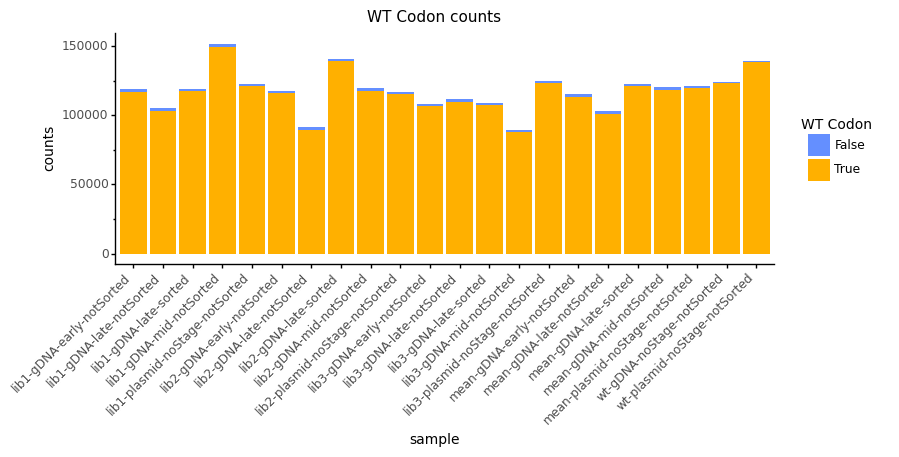

<ggplot: (8760012196253)>

In [14]:
wt_counts = (p9.ggplot(codon_counts) +
              p9.aes(x='name',
                     y='count',
                     fill='factor(codon == wildtype)') +
              p9.geom_bar(stat='identity') +
              p9.ggtitle('WT Codon counts') +
              p9.labs(x='sample',
                      y='counts',
                      fill='WT Codon') +
              p9.theme(figure_size=(0.5*samples['name'].nunique(), 
                                    3),
                       plot_title=p9.element_text(size=11),
                       axis_title=p9.element_text(size=10),
                       axis_text_x=p9.element_text(rotation=45, hjust=1),
                       legend_position='right',
                       legend_title=p9.element_text(size=10),
                       legend_title_align='center') +
              p9.scale_fill_manual(CBPALETTE_RICH[0:])
              )

display(wt_counts)

Interpretation: These samples have very low mutation rates.

**Show count of all codons except for WT:**

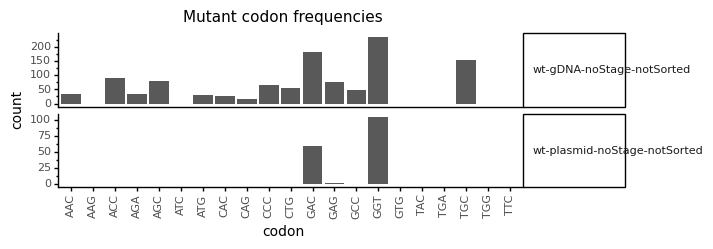

<ggplot: (8760003256221)>

In [15]:
codon_counts_noWT_plot = (
    p9.ggplot(codon_counts
              .query('codon != wildtype')
              .query('library == "wt"')) +
    p9.aes(x='codon',
           y='count') +
    p9.geom_bar(stat='identity') +
    p9.facet_grid('name~', scales='free_y') +
    p9.ggtitle('Mutant codon frequencies') +
    p9.labs(x='codon',
            y='count') +
    p9.theme(figure_size=(6, 2),
             plot_title=p9.element_text(size=11),
             axis_title=p9.element_text(size=10),
             axis_text_x=p9.element_text(size=8, rotation=90),
             axis_text_y=p9.element_text(size=8),
             strip_text_y=p9.element_text(size=8,angle=0, ha='left'),
             strip_background_y=p9.element_text(width=0.22))
   )

display(codon_counts_noWT_plot)

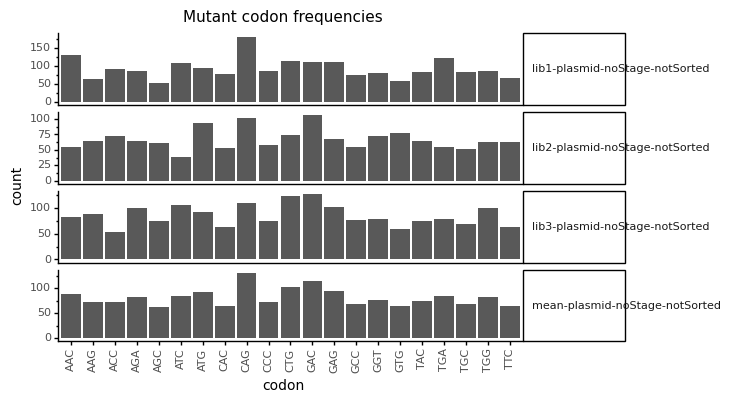

<ggplot: (8760001478569)>

In [16]:
codon_counts_noWT_plot = (
    p9.ggplot(codon_counts
              .query('codon != wildtype')
              .query('library != "wt"')
              .query('source == "plasmid"')) +
    p9.aes(x='codon',
           y='count') +
    p9.geom_bar(stat='identity') +
    p9.facet_grid('name~', scales='free_y') +
    p9.ggtitle('Mutant codon frequencies') +
    p9.labs(x='codon',
            y='count') +
    p9.theme(figure_size=(6, 4),
             plot_title=p9.element_text(size=11),
             axis_title=p9.element_text(size=10),
             axis_text_x=p9.element_text(size=8, rotation=90),
             axis_text_y=p9.element_text(size=8),
             strip_text_y=p9.element_text(size=8,angle=0, ha='left'),
             strip_background_y=p9.element_text(width=0.22))
   )

display(codon_counts_noWT_plot)

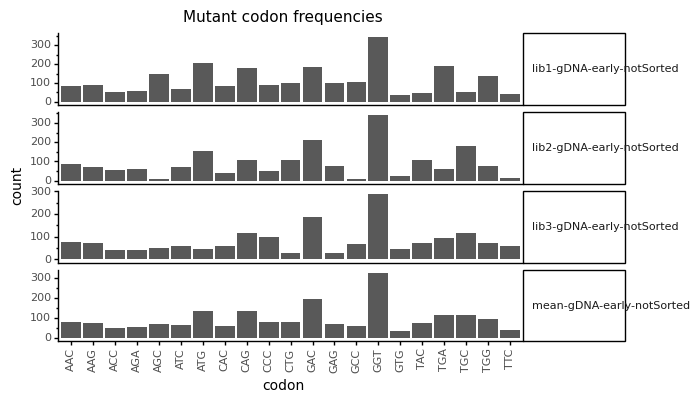

<ggplot: (8760001308061)>

In [17]:
codon_counts_noWT_plot = (
    p9.ggplot(codon_counts
              .query('codon != wildtype')
              .query('library != "wt"')
              .query('source == "gDNA"')
              .query('stage == "early"')) +
    p9.aes(x='codon',
           y='count') +
    p9.geom_bar(stat='identity') +
    p9.facet_grid('name~', scales='free_y') +
    p9.ggtitle('Mutant codon frequencies') +
    p9.labs(x='codon',
            y='count') +
    p9.theme(figure_size=(6, 4),
             plot_title=p9.element_text(size=11),
             axis_title=p9.element_text(size=10),
             axis_text_x=p9.element_text(size=8, rotation=90),
             axis_text_y=p9.element_text(size=8),
             strip_text_y=p9.element_text(size=8,angle=0, ha='left'),
             strip_background_y=p9.element_text(width=0.22))
   )

display(codon_counts_noWT_plot)

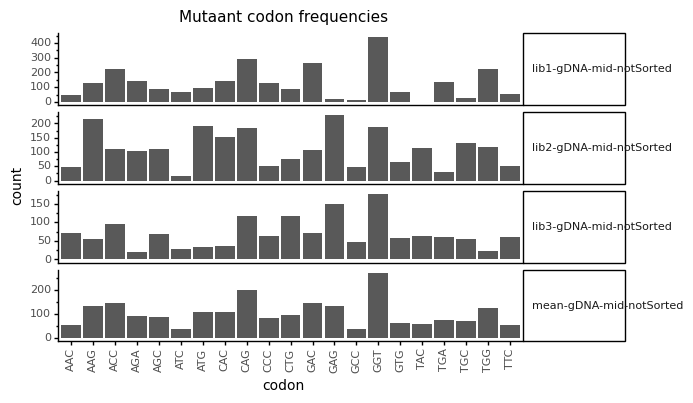

<ggplot: (8760001165389)>

In [18]:
codon_counts_noWT_plot = (
    p9.ggplot(codon_counts
              .query('codon != wildtype')
              .query('library != "wt"')
              .query('source == "gDNA"')
              .query('stage == "mid"')) +
    p9.aes(x='codon',
           y='count') +
    p9.geom_bar(stat='identity') +
    p9.facet_grid('name~', scales='free_y') +
    p9.ggtitle('Mutaant codon frequencies') +
    p9.labs(x='codon',
            y='count') +
    p9.theme(figure_size=(6, 4),
             plot_title=p9.element_text(size=11),
             axis_title=p9.element_text(size=10),
             axis_text_x=p9.element_text(size=8, rotation=90),
             axis_text_y=p9.element_text(size=8),
             strip_text_y=p9.element_text(size=8,angle=0, ha='left'),
             strip_background_y=p9.element_text(width=0.22))
   )

display(codon_counts_noWT_plot)

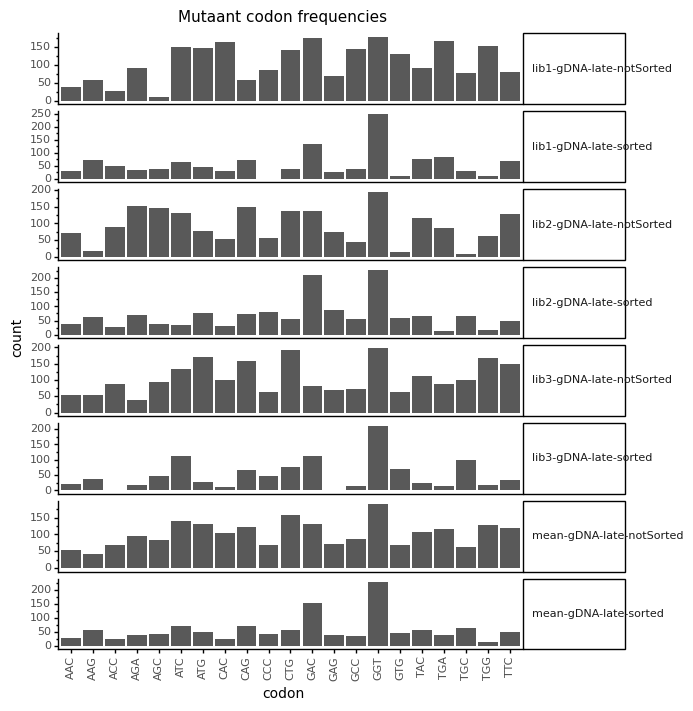

<ggplot: (8759996779581)>

In [19]:
codon_counts_noWT_plot = (
    p9.ggplot(codon_counts
              .query('codon != wildtype')
              .query('library != "wt"')
              .query('source == "gDNA"')
              .query('stage == "late"')) +
    p9.aes(x='codon',
           y='count') +
    p9.geom_bar(stat='identity') +
    p9.facet_grid('name~', scales='free_y') +
    p9.ggtitle('Mutaant codon frequencies') +
    p9.labs(x='codon',
            y='count') +
    p9.theme(figure_size=(6, 8),
             plot_title=p9.element_text(size=11),
             axis_title=p9.element_text(size=10),
             axis_text_x=p9.element_text(size=8, rotation=90),
             axis_text_y=p9.element_text(size=8),
             strip_text_y=p9.element_text(size=8,angle=0, ha='left'),
             strip_background_y=p9.element_text(width=0.22))
   )

display(codon_counts_noWT_plot)

Interpretation: codon counts are equally distributed in plasmid libraries. They are enriched for GGT, which appears to be present at low levels in WT plasmid library.